## Project Assignment 2 

Nama: A. A. Anggita Yuniskara Dewi 

Kode Peserta: PYTN-KS19-025

Sumber: https://www.kaggle.com/datasets/new-york-city/nyc-property-sales

### Import Function

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import math
import statistics 
import scipy.stats
from scipy.stats import gaussian_kde
from scipy.stats import shapiro, jarque_bera
from statistics import NormalDist
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import shapiro

### Read Dataset

In [4]:
data_nyc = pd.read_csv('nyc-rolling-sales.csv')
data_nyc.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [6]:
data_nyc.head(10)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,...,20,0,20,2581,9730,1900,2,C4,-,2017-07-20 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,...,44,2,46,5163,21007,1900,2,C7,-,2017-07-20 00:00:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,...,15,0,15,1534,9198,1920,2,D5,-,2017-06-20 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


In [7]:
data_nyc.tail(10)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84538,8404,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,61,,B2,178 DARNELL LANE,...,2,0,2,3215,1300,1995,1,B2,-,2017-06-30 00:00:00
84539,8405,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,85,,B2,137 DARNELL LANE,...,2,0,2,3016,1300,1995,1,B2,-,2016-12-30 00:00:00
84540,8406,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,93,,B2,125 DARNELL LANE,...,2,0,2,3325,1300,1995,1,B2,509000,2016-10-31 00:00:00
84541,8407,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,126,,B2,112 ROBIN COURT,...,2,0,2,11088,2160,1994,1,B2,648000,2016-12-07 00:00:00
84542,8408,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7339,41,,B9,41 SONIA COURT,...,2,0,2,3020,1800,1997,1,B9,-,2016-12-01 00:00:00
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


### Data Cleansing 

#### Check Data Type 

In [9]:
df = data_nyc.copy()

In [10]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [11]:
df.columns = df.columns.str.replace(" ","_")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING_CLASS_CATEGORY         84548 non-null  object
 3   TAX_CLASS_AT_PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   EASE-MENT                       84548 non-null  object
 7   BUILDING_CLASS_AT_PRESENT       84548 non-null  object
 8   ADDRESS                         84548 non-null  object
 9   APARTMENT_NUMBER                84548 non-null  object
 10  ZIP_CODE                        84548 non-null  int64 
 11  RESIDENTIAL_UNITS               84548 non-null  int64 
 12  COMMERCIAL_UNITS                84548 non-null

Rubah menjadi variabel numerik 

In [15]:
numerical_col = ['RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS', 'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'SALE_PRICE']
    
for i in numerical_col:
    df[i] = pd.to_numeric(df[i], errors='coerce')

Rubah menjadi variabel kategori 

In [16]:
categorical_var = [var for var in df.columns if df[var].dtype=='O']
categorical_var

['NEIGHBORHOOD',
 'BUILDING_CLASS_CATEGORY',
 'TAX_CLASS_AT_PRESENT',
 'EASE-MENT',
 'BUILDING_CLASS_AT_PRESENT',
 'ADDRESS',
 'APARTMENT_NUMBER',
 'BUILDING_CLASS_AT_TIME_OF_SALE',
 'SALE_DATE']

Rubah kolom SALE_DATE menjadi datetime

In [18]:
df['SALE_DATE'] = pd.to_datetime(df['SALE_DATE'])

Rename borough: 

- 1 = Manhattan
- 2 = Bronx
- 3 = Brooklyn
- 4 = Queens 
- 5 = Staten Island

In [19]:
df['BOROUGH'] = df.BOROUGH.replace({1: "Manhattan", 2: "Bronx", 3: "Brooklyn", 4: "Queens", 5: "Staten Island"})
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,...,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  object        
 1   NEIGHBORHOOD                    84548 non-null  object        
 2   BUILDING_CLASS_CATEGORY         84548 non-null  object        
 3   TAX_CLASS_AT_PRESENT            84548 non-null  object        
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   EASE-MENT                       84548 non-null  object        
 7   BUILDING_CLASS_AT_PRESENT       84548 non-null  object        
 8   ADDRESS                         84548 non-null  object        
 9   APARTMENT_NUMBER                84548 non-null  object        
 10  ZIP_CODE                        84548 non-null  int64         
 11  RE

Kemudian rubah spasi kosong dengan kode "NaN", kemudian lakukan pemeriksaan terhadap data untuk menentukan apakah ada kumpulan data yang berisi data yang hilang, kosong, atau terduplikasi. 

In [21]:
df.replace(' ', np.nan, inplace = True)
df.isna().sum() /len(df) *100

BOROUGH                             0.000000
NEIGHBORHOOD                        0.000000
BUILDING_CLASS_CATEGORY             0.000000
TAX_CLASS_AT_PRESENT                0.872877
BLOCK                               0.000000
LOT                                 0.000000
EASE-MENT                         100.000000
BUILDING_CLASS_AT_PRESENT           0.872877
ADDRESS                             0.000000
APARTMENT_NUMBER                   77.466055
ZIP_CODE                            0.000000
RESIDENTIAL_UNITS                   0.000000
COMMERCIAL_UNITS                    0.000000
TOTAL_UNITS                         0.000000
LAND_SQUARE_FEET                   31.049818
GROSS_SQUARE_FEET                  32.658372
YEAR_BUILT                          0.000000
TAX_CLASS_AT_TIME_OF_SALE           0.000000
BUILDING_CLASS_AT_TIME_OF_SALE      0.000000
SALE_PRICE                         17.222170
SALE_DATE                           0.000000
dtype: float64

Check data yang hilang atau kosong 

In [22]:
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING_CLASS_CATEGORY               0
TAX_CLASS_AT_PRESENT                738
BLOCK                                 0
LOT                                   0
EASE-MENT                         84548
BUILDING_CLASS_AT_PRESENT           738
ADDRESS                               0
APARTMENT_NUMBER                  65496
ZIP_CODE                              0
RESIDENTIAL_UNITS                     0
COMMERCIAL_UNITS                      0
TOTAL_UNITS                           0
LAND_SQUARE_FEET                  26252
GROSS_SQUARE_FEET                 27612
YEAR_BUILT                            0
TAX_CLASS_AT_TIME_OF_SALE             0
BUILDING_CLASS_AT_TIME_OF_SALE        0
SALE_PRICE                        14561
SALE_DATE                             0
dtype: int64

Hapus kolom yang tidak relevan

In [23]:
df = df.drop(['EASE-MENT', 'APARTMENT_NUMBER', 'BLOCK', 'LOT', 'ADDRESS'], axis = 1)

Hapus data dengan kode NaN dari kolom TAX_CLASS_AT_PRESENT dan BUILDING_CLASS_AT_PRESENT

In [24]:
df = df.dropna(subset=['TAX_CLASS_AT_PRESENT', 'BUILDING_CLASS_AT_PRESENT'])

Rubah data dengan kode NaN menjadi 0 pada kolom LAND_SQUARE_FEET, GROSS_SQUARE_FEET, dan SALE_PRICE

In [25]:
for i in ['LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'SALE_PRICE']:
    df[i] = df[i].fillna(0)

In [26]:
df = df[df['SALE_PRICE'] != 0]
df

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BUILDING_CLASS_AT_PRESENT,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,C2,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,C2,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,D9,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,B9,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,B9,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,B2,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,K6,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21


Cek kembali data tersebut apakah masih memiliki data dengan kode NaN

In [28]:
df.isna().sum().sum()

0

Melakukan pengecekan pada plot kotak apakah terdapat outlier

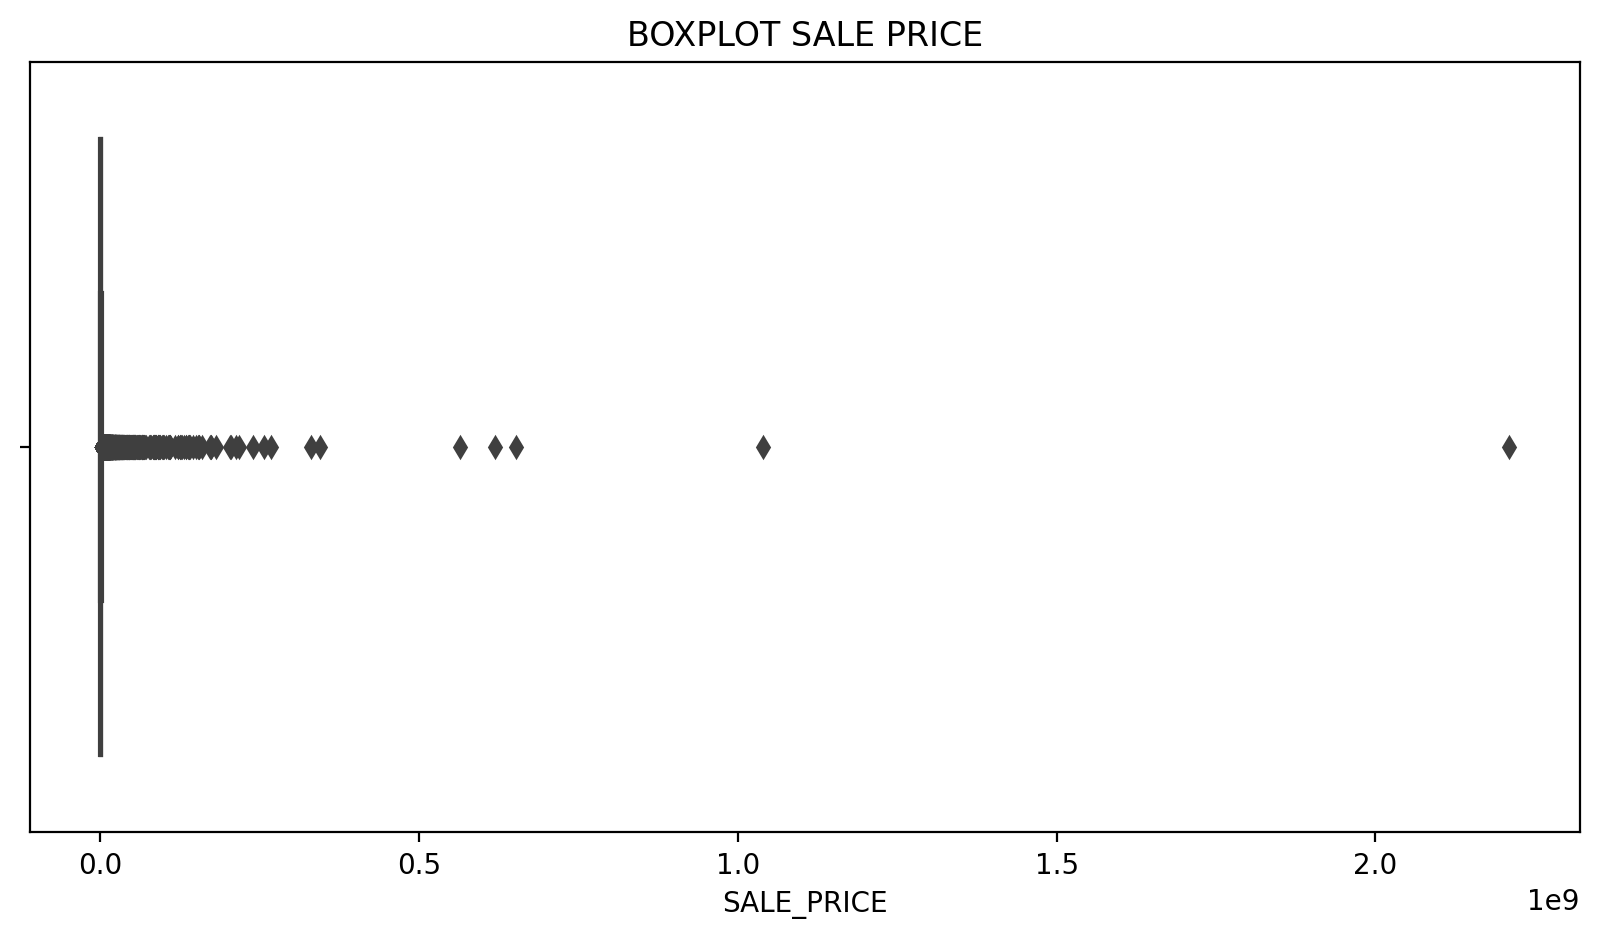

In [29]:
plt.figure(figsize=(10,5), dpi = 200)

sns.boxplot(data = df,x = 'SALE_PRICE')
plt.xlabel('SALE_PRICE')
plt.title('BOXPLOT SALE PRICE')
plt.show()

Lakukan deteksi dan hapus outlier dengan menggunakan metode IQR (Interquartile Range)

In [30]:
saleprice_q1 = df['SALE_PRICE'].describe().loc['25%']
saleprice_q3 = df['SALE_PRICE'].describe().loc['75%']
saleprice_iqr = saleprice_q3 - saleprice_q1

saleprice_lower_limit = saleprice_q1 - (1.5 * saleprice_iqr)
saleprice_upper_limit = saleprice_q3 + (1.5 * saleprice_iqr)

In [31]:
df_cleaned = df[(df['SALE_PRICE'] >= saleprice_lower_limit) & (df['SALE_PRICE'] <= saleprice_upper_limit)]
df_cleaned.head()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BUILDING_CLASS_AT_PRESENT,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
12,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,C6,10009,0,0,0,0.0,0.0,1920,2,C6,1.0,2016-09-06
13,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,C6,10009,0,0,0,0.0,0.0,1920,2,C6,499000.0,2017-03-10
14,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,C6,10009,0,0,0,0.0,0.0,1920,2,C6,10.0,2017-04-28
15,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,C6,10009,0,0,0,0.0,0.0,1920,2,C6,529500.0,2017-06-09
16,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,C6,10009,0,0,0,0.0,0.0,1920,2,C6,423000.0,2017-07-14


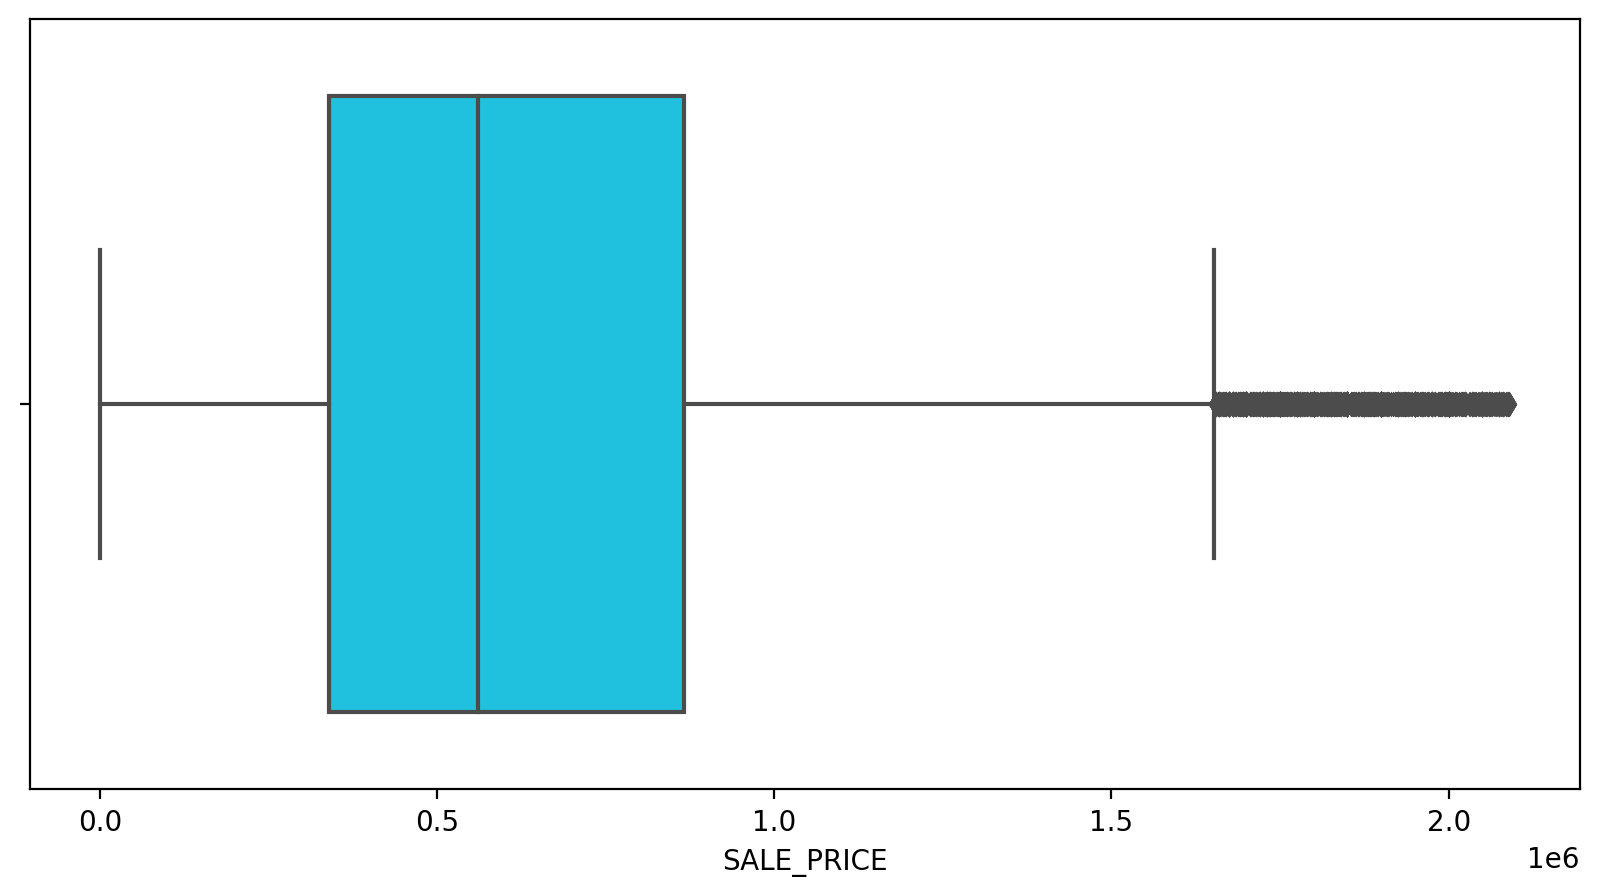

In [32]:
plt.figure(figsize=(10,5), dpi = 200)

sns.boxplot(data=df_cleaned, x = 'SALE_PRICE',
            color = sns.color_palette('bright')[9])
plt.xlabel('SALE_PRICE')
plt.show()

Melalui visualisasi di atas dapat terlihat bahwa dataset masih memiliki banyak outlier, yang mana dengan ini hal yang dapat dilakukan adalah dengan melakukan langkah - langkah di atas kembali hingga nanti dataset tidak mengandung outliers kembali.

In [34]:
n = 1 
limit = 2 

while n <= limit:
    saleprice_q1 = df_cleaned['SALE_PRICE'].describe().loc['25%']
    saleprice_q3 = df_cleaned['SALE_PRICE'].describe().loc['75%']
    saleprice_iqr = saleprice_q3 - saleprice_q1
    
    saleprice_lower_limit = saleprice_q1 - (1.5 * saleprice_iqr)
    saleprice_upper_limit = saleprice_q3 + (1.5 * saleprice_iqr)
    
    df_cleaned = df_cleaned[(df_cleaned['SALE_PRICE'] >= saleprice_lower_limit)
                                        & (df_cleaned['SALE_PRICE'] <= saleprice_upper_limit)]
    
    n += 1 

In [35]:
df_cleaned.head()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BUILDING_CLASS_AT_PRESENT,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
12,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,C6,10009,0,0,0,0.0,0.0,1920,2,C6,1.0,2016-09-06
13,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,C6,10009,0,0,0,0.0,0.0,1920,2,C6,499000.0,2017-03-10
14,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,C6,10009,0,0,0,0.0,0.0,1920,2,C6,10.0,2017-04-28
15,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,C6,10009,0,0,0,0.0,0.0,1920,2,C6,529500.0,2017-06-09
16,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,C6,10009,0,0,0,0.0,0.0,1920,2,C6,423000.0,2017-07-14


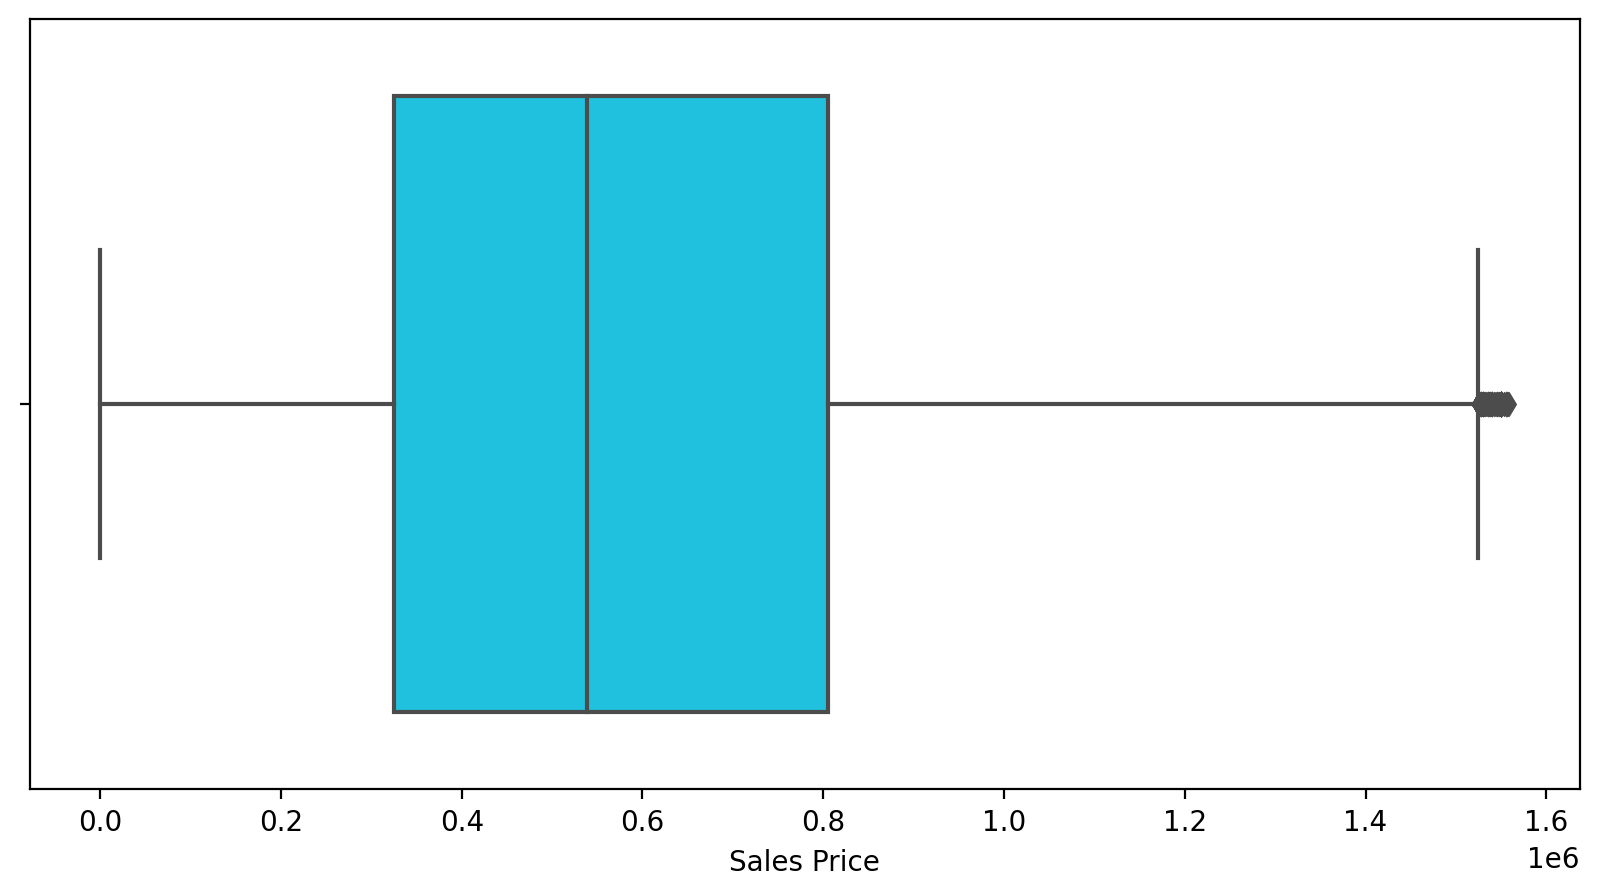

In [36]:
plt.figure(figsize=(10,5), dpi=200)

sns.boxplot(data = df_cleaned, x = 'SALE_PRICE', 
            color=sns.color_palette('bright')[9])
plt.xlabel('Sales Price')
plt.show()

### Measures of Central Tendency 

Melakukan perhitungan ukuran statistik tendensi sentral berdasarkan data borough dan tax_class_at_present, dengan menggunakan:

- Mean 
- Median
- Mode
- Range 
- Variance
- Standard Deviation

In [38]:
measure_ct = df_cleaned.groupby(['BOROUGH', 'TAX_CLASS_AT_PRESENT']).agg({'SALE_PRICE':[np.mean,
                                                                                        np.median,
                                                                                        statistics.mode,
                                                                                        np.ptp,
                                                                                        np.var,
                                                                                    np.std]}).reset_index()
measure_ct.columns = measure_ct.columns.droplevel(-1)
measure_ct.columns = ['BOROUGH', 'TAX_CLASS_AT_PRESENT', 'MEAN', 'MEDIAN', 'MODE', 'RANGE', 'VARIANCE', 'STANDARD DEVIATION']
measure_ct = measure_ct.dropna()
measure_ct

,BOROUGH,TAX_CLASS_AT_PRESENT,MEAN,MEDIAN,MODE,RANGE,VARIANCE,STANDARD DEVIATION
0,Bronx,1,4.504145e+05,450000.0,10.0,1549999.0,3.707326e+10,192544.183408
1,Bronx,1A,3.158523e+05,310000.0,230000.0,802281.0,2.226090e+10,149200.871084
2,Bronx,1B,3.361601e+05,290000.0,1000.0,1464999.0,1.180873e+11,343638.290800
3,Bronx,2,2.085942e+05,165000.0,110000.0,1549999.0,2.804608e+10,167469.651995
4,Bronx,2A,5.919874e+05,607500.0,650000.0,1529990.0,7.658155e+10,276733.717268
5,Bronx,2B,1.058427e+06,1100000.0,1100000.0,1554990.0,1.099603e+11,331602.622903
7,Bronx,4,5.732818e+05,550000.0,800000.0,1499999.0,1.788531e+11,422910.221549
8,Brooklyn,1,7.234036e+05,700000.0,10.0,1558999.0,1.432219e+11,378446.702578
9,Brooklyn,1A,5.522666e+05,529745.0,10.0,1509999.0,8.506974e+10,291667.179102
10,Brooklyn,1B,4.306487e+05,295100.5,150000.0,1449999.0,1.550468e+11,393759.777053


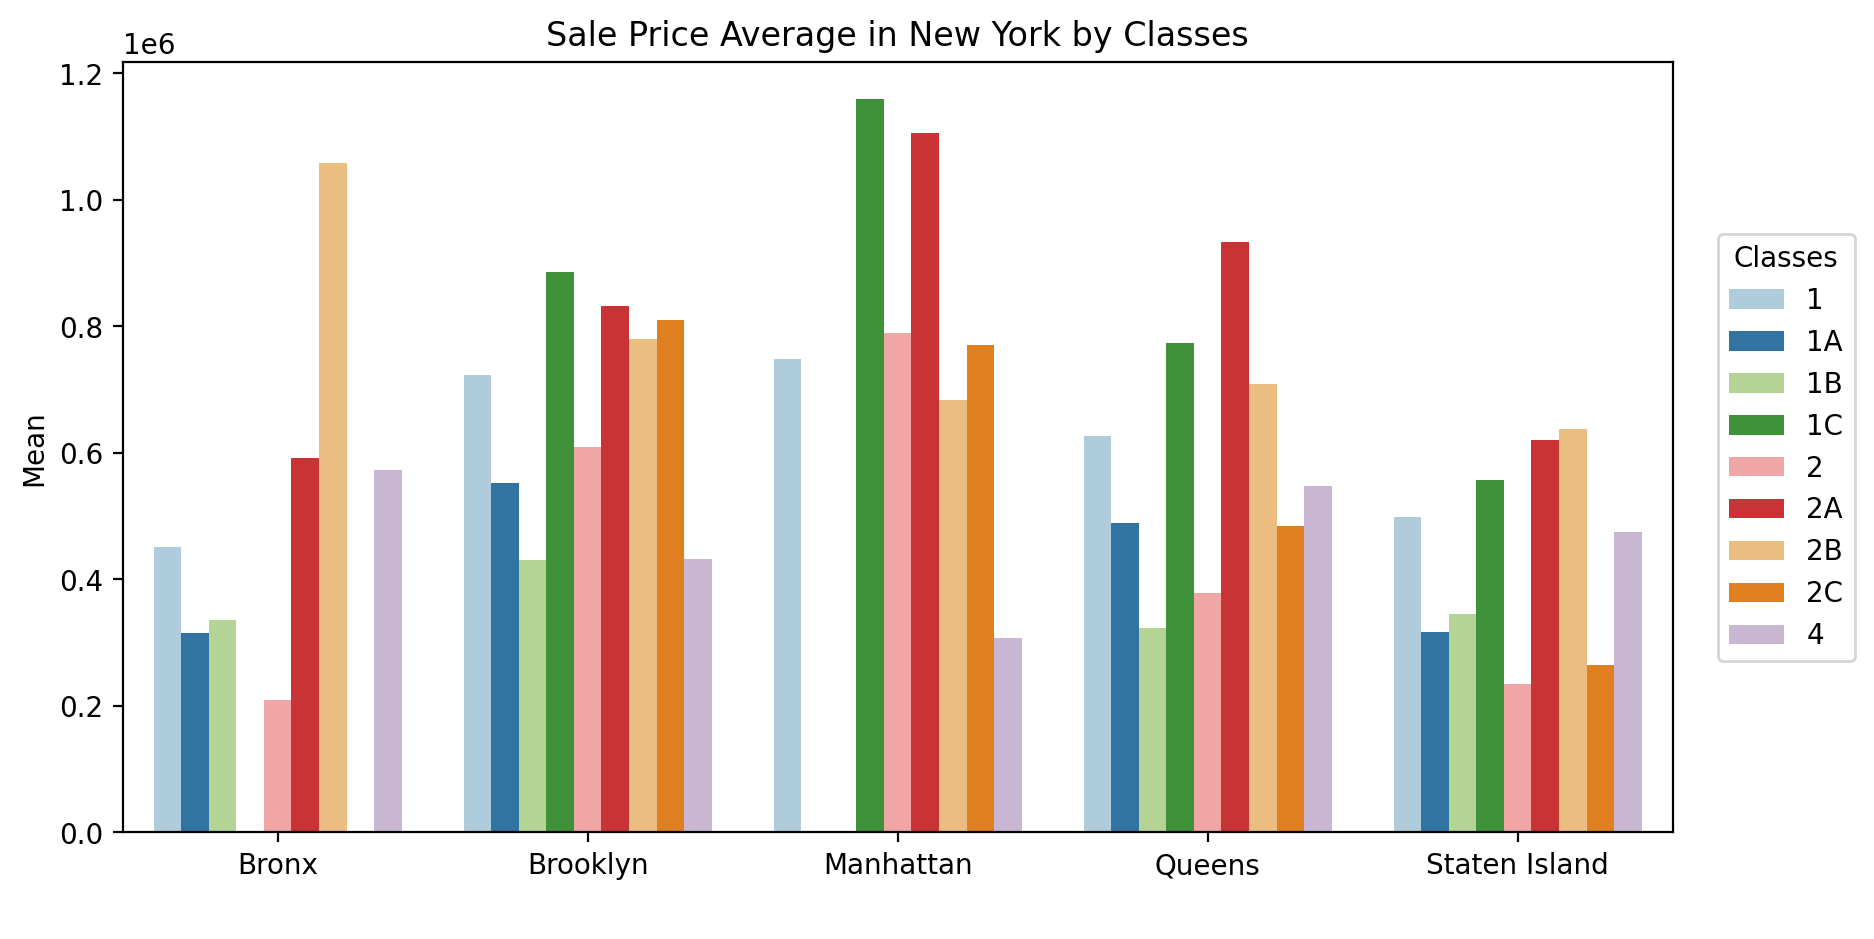

In [39]:
plt.figure(figsize=(10,5), dpi=200)
sns.barplot(data=measure_ct, x = 'BOROUGH', y = 'MEAN', hue = 'TAX_CLASS_AT_PRESENT', palette = 'Paired',
            hue_order = np.sort(measure_ct['TAX_CLASS_AT_PRESENT'].unique()))
plt.title('Sale Price Average in New York by Classes')
plt.xlabel(' ')
plt.ylabel('Mean')
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left', title = 'Classes')
plt.show()

### Confidence Intervals of the Sample Means 

Berdasarkan size_ct terlihat bahwa Manhattan (1C), Manhattan (2A), dan Bronx (2B) menempati posisi 3 teratas dalam sale_price

In [40]:
top3_means = measure_ct.sort_values('MEAN', ascending=False).head(3)
top3_means

,BOROUGH,TAX_CLASS_AT_PRESENT,MEAN,MEDIAN,MODE,RANGE,VARIANCE,STANDARD DEVIATION
19,Manhattan,1C,1.159167e+06,1102500.0,900000.0,575000.0,8.506458e+10,291658.333214
21,Manhattan,2A,1.105614e+06,1300000.0,1320000.0,1524990.0,2.681566e+11,517838.423801
5,Bronx,2B,1.058427e+06,1100000.0,1100000.0,1554990.0,1.099603e+11,331602.622903


In [42]:
temp = []
for i, j in zip(top3_means['BOROUGH'], top3_means['TAX_CLASS_AT_PRESENT']):
                temp.append(df_cleaned[(df_cleaned['BOROUGH'] == i) &
                                       (df_cleaned['TAX_CLASS_AT_PRESENT'] == j)])
                
top3_sale_price = np.array(pd.concat(temp)['SALE_PRICE'])
top3_sale_price
                            

array([9.000000e+05, 1.102500e+06, 1.475000e+06, 1.000000e+01,
       3.130000e+05, 1.320000e+06, 1.800000e+05, 8.425000e+05,
       1.431326e+06, 1.100000e+06, 1.525000e+06, 1.300000e+06,
       1.300000e+06, 1.469500e+06, 1.275000e+06, 1.487500e+06,
       1.525000e+06, 1.400000e+06, 4.063000e+03, 1.320000e+06,
       1.500000e+06, 1.515000e+06, 1.130000e+06, 1.280000e+06,
       1.315000e+06, 8.800000e+05, 9.500000e+05, 1.100000e+06,
       1.175000e+06, 8.750000e+05, 1.200000e+06, 1.250000e+06,
       1.250000e+06, 1.100000e+06, 1.175000e+06, 1.525000e+06,
       1.100000e+06, 1.050000e+06, 4.300000e+04, 1.350000e+06,
       1.020000e+06, 1.400000e+06, 1.260000e+06, 7.500000e+05,
       1.555000e+06, 8.400000e+05, 1.000000e+06, 5.000000e+05,
       1.425000e+06, 1.200000e+06, 1.450000e+06, 1.232030e+06,
       1.150000e+06, 1.350000e+06, 1.265000e+06, 1.264000e+06,
       1.150000e+06, 1.100000e+06, 7.650000e+05, 1.380000e+06,
       1.000000e+06, 8.500000e+05, 9.400000e+05, 9.1000

Melalui data di atas, buat sample_mean kemudian diambil 30 random sample untuk dihitung meannya sebanyak 300 kali

In [43]:
np.random.seed(9091)
sample_means = []
n = 30

for sample in range(300):
    sample_value = np.random.choice(a=top3_sale_price, size = n)
    sample_mean = np.mean(sample_value)
    sample_means.append(sample_mean)

Buat visualisasi dari sample_mean

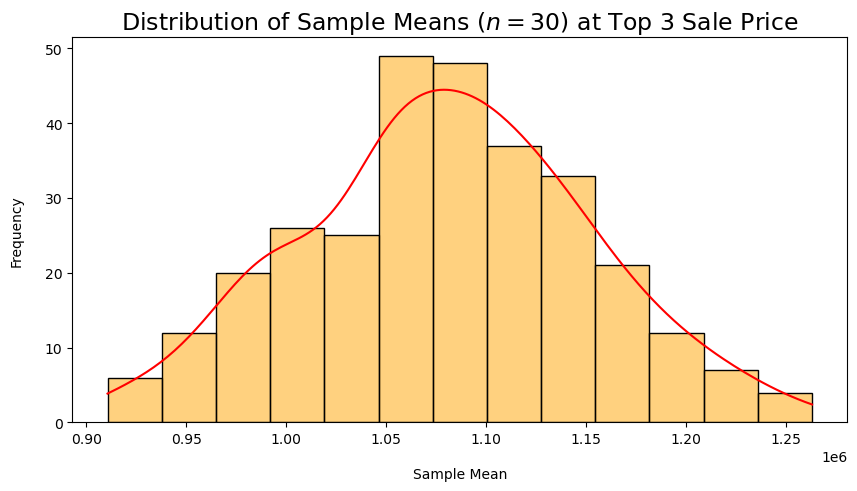

In [44]:
plt.figure(figsize=(10,5), dpi = 100)
ax = sns.histplot(data=sample_means, kde = True, color = 'orange')
ax.lines[0].set_color('red')
plt.title('Distribution of Sample Means ($n=30$) at Top 3 Sale Price', fontsize = 17)
plt.xlabel('Sample Mean', labelpad = 15)
plt.ylabel('Frequency', labelpad=15);
plt.show()

Hitung z-score 

In [45]:
conf = 0.95
z = NormalDist().inv_cdf((1 + conf) /2)
z

1.9599639845400536

Kemudian hitunglah nilai median dari sample_means, mean dari sample_means, dan standar deviasi dari sample_means 

In [48]:
sample_of_mean_median = np.median(sample_means)
sample_of_mean_mean = np.mean(sample_means)
sample_of_mean_std = np.std(sample_means)

print('Median:', sample_of_mean_median)
print('Mean:', sample_of_mean_mean)
print('Standar deviasi:', sample_of_mean_std)

Median: 1082597.7666666666
Mean: 1079756.3685555556
Standar deviasi: 71341.2058705018


Hitung standar error dari top3_sale_price

In [50]:
std_error = np.std(top3_sale_price)/np.sqrt(n)
std_error

71105.30441572449

Hitung nilai upper dan lower limit

In [51]:
lower_95 = sample_of_mean_mean - (z *std_error)
upper_95 = sample_of_mean_mean + (z * std_error)

print('Lower Limit:', lower_95)
print('Upper Limit:', upper_95)

Lower Limit: 940392.5327909788
Upper Limit: 1219120.2043201325


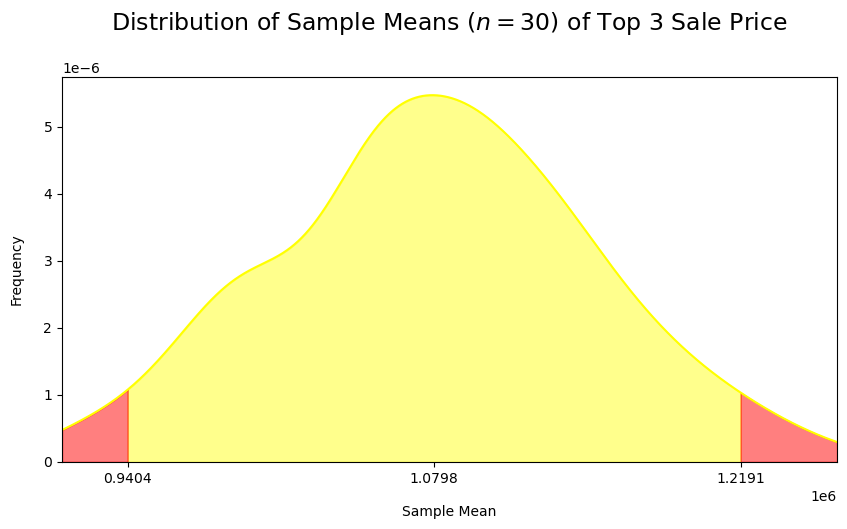

In [53]:
plt.figure(figsize = (10,5), dpi = 100)
kde = gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means), np.max(sample_means), 10000)
plt.plot(pos, kde(pos), color = 'yellow')
shade = np.linspace(lower_95, upper_95, 300)

plt.fill_between(shade, kde(shade), alpha = 0.45, color ='yellow')
plt.xticks([lower_95, sample_of_mean_mean, upper_95])
plt.xlim(xmin = np.min(sample_means), xmax = np.max(sample_means))
plt.ylim(ymin=0)

left = np.linspace(np.min(sample_means), lower_95, 10000)
right = np.linspace(upper_95, np.max(sample_means), 10000)
for i in [left, right]:
    plt.fill_between(i, kde(i), color = 'red', alpha = 0.5)
    
plt.title('Distribution of Sample Means ($n = 30$) of Top 3 Sale Price', y = 1.1, fontsize = 17)
plt.xlabel('Sample Mean', labelpad = 14)
plt.ylabel('Frequency', labelpad = 14);
plt.show()

Kesimpulan: Berdasarkan alur yang ditentukan adalah 95% kemungkinan rata-rata sampel n =30 akan berada dalam area yang diarsir kuning. Jadi, probabilitas bahwa rata-rata sampel dengan n = 30 akan berada di luar area yang diarsir kuning 5%


### Distribusi Probabilitas dan Pengujian Hipotesis

#### Hipotesis 

- H0 = top3_sale_price data is normally
- H1 = top3_sale_price data is not normally distributed 

#### Significance Level

alfa = 5%

#### Test Statistics 

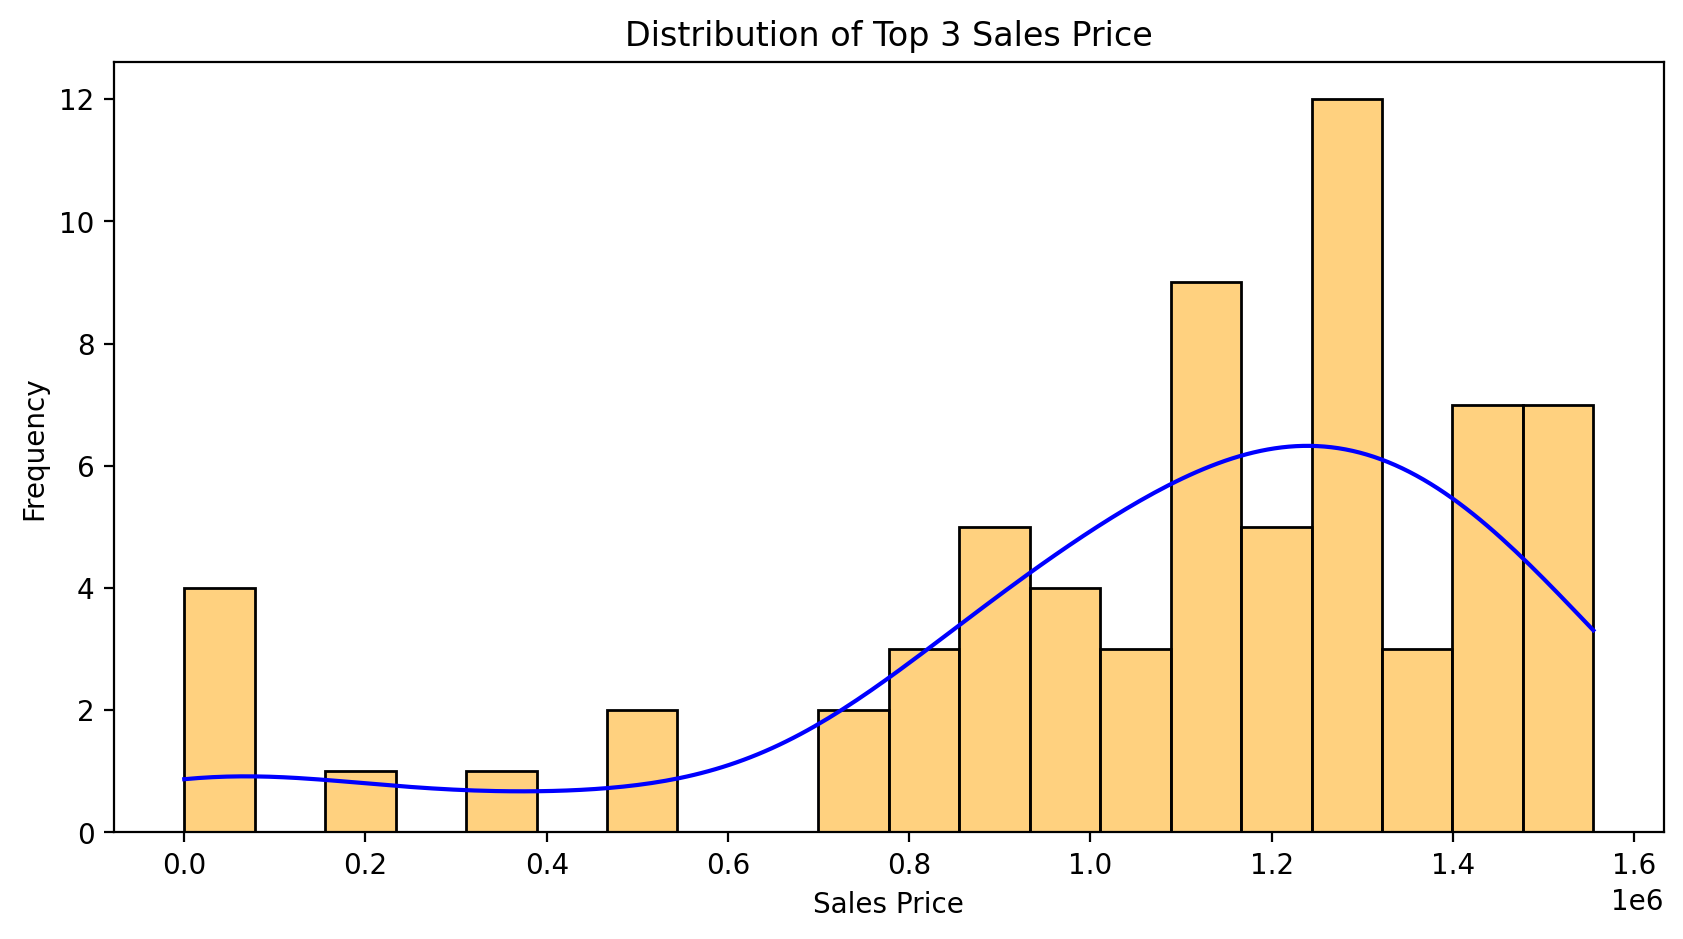

,Kolmogorov-Smirnov,Prob. (K-S),Shapiro-Wilk,Prob. (S-W)
,0.155275,0.000325,0.858422,0.000002


In [56]:
plt.figure(figsize=(10,5), dpi = 200)
ax = sns.histplot(data=top3_sale_price, bins=20, kde=True, color='orange')
ax.lines[0].set_color('blue')
plt.title('Distribution of Top 3 Sales Price')
plt.xlabel('Sales Price')
plt.ylabel('Frequency')
plt.show()

ks_stat, ks_pvalue = lilliefors(top3_sale_price, dist='norm', pvalmethod='approx')
sw_stat, sw_pvalue = shapiro(top3_sale_price)

pd.DataFrame({
    'Kolmogorov-Smirnov':[ks_stat],
    'Prob. (K-S)':[ks_pvalue],
    'Shapiro-Wilk':[sw_stat],
    'Prob. (S-W)':[sw_pvalue]
},index=[' '])

Kesimpulan: nilai tersebut dapat diambil dengan menggunakan uji normalitas formal yaitu uji Kolmogorov-Smirnov dan uji Shapiro-Wilk. Hasil pengujian menunjukkan nilai probabilitas K-S dan S-W sangat kecil yaitu 0,000325 dan 0,000002. Nilai tersebut lebih kecil dari taraf signifikansi 0,05 sehingga dapat disimpulkan bahwa sebaran top3_sale_price tidak normal.

### Transformation

Melalui fakta di atas dapat diketahui bahwa data tidak normal sehingga dapat dilakukan pengubahan sehingga menjadi berdistribusi normal

In [57]:
transform_top3 = np.sqrt(np.max(top3_sale_price) - top3_sale_price)
transform_top3

array([ 809.32070281,  672.68120235,  282.84271247, 1246.99238169,
       1114.45053726,  484.76798574, 1172.60393996,  844.09715081,
        351.6731437 ,  674.53687816,  173.20508076,  504.97524692,
        504.97524692,  292.40383034,  529.15026221,  259.80762114,
        173.20508076,  393.7003937 , 1245.3662112 ,  484.76798574,
        234.52078799,  200.        ,  651.92024052,  524.40442409,
        489.89794856,  821.58383626,  777.81745931,  674.53687816,
        616.4414003 ,  824.62112512,  595.81876439,  552.26805086,
        552.26805086,  674.53687816,  616.4414003 ,  173.20508076,
        674.53687816,  710.63352018, 1229.63409192,  452.76925691,
        731.43694192,  393.7003937 ,  543.13902456,  897.21792225,
          0.        ,  845.57672626,  744.98322129, 1027.13192921,
        360.55512755,  595.81876439,  324.03703492,  568.30449585,
        636.39610307,  452.76925691,  538.51648071,  539.44415837,
        636.39610307,  674.53687816,  888.81944173,  418.33001

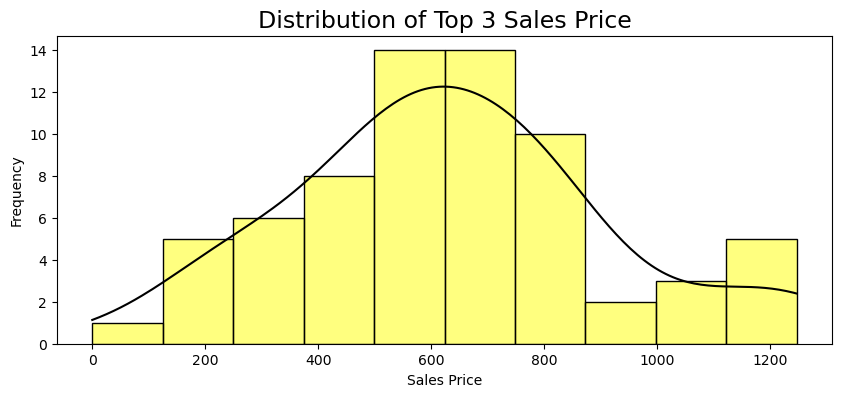

,Kolmogorov-Smirnov,Prob. (K-S),Shapiro-Wilk,Prob. (S-W)
,0.076455,0.479724,0.975025,0.188753


In [58]:
plt.figure(figsize=(10,4), dpi=100)
ax = sns.histplot(data=transform_top3, bins = 10, kde = True, color='yellow')
ax.lines[0].set_color('black')
plt.xlabel('Sales Price')
plt.ylabel('Frequency')
plt.title('Distribution of Top 3 Sales Price', fontsize = 17)
plt.show()

ks_stat, ks_pval = lilliefors(transform_top3, dist = 'norm', pvalmethod = 'approx')
sw_stat, sw_pval = shapiro(transform_top3)

pd.DataFrame({
    'Kolmogorov-Smirnov':[ks_stat],
    'Prob. (K-S)':[ks_pval],
    'Shapiro-Wilk':[sw_stat],
    'Prob. (S-W)':[sw_pval]
}, index=[" "])

Kesimpulan: Pada taraf signifikansi 5%, hipotesis nol (H0) ditolak karena nilai p-value yang diperoleh baik dari uji Kolmogorov-Smirnov maupun uji Shapiro-Wilk berada di bawah 0,05. Namun, setelah transformasi data, H0 kini diterima karena probabilitas Kolmogorov-Smirnov adalah 0,479724 dan probabilitas Shapiro-Wilk adalah 0,188753, keduanya melebihi 0,05. Hasil keluaran menunjukkan distribusi yang simetris secara visual. Oleh karena itu, dapat disimpulkan bahwa data top3_sale_price menunjukkan normalitas.